# Introduction
####  Build a RAG Based Assistant to Deliver Role-Specific Insights Across Departments in a Fintech Company


# Problem Statement
- FinSolve Technologies, is a leading FinTech company providing innovative financial solutions and services to individuals, businesses, and enterprises.

- Recently, teams have been facing delays in communication and difficulty accessing the right data at the right time, which has led to inefficiencies. These delays and data silos between different departments like Finance, Marketing, HR, and C-Level Executives have created roadblocks in decision-making, strategic planning, and project execution.

- To address these challenges, Tony Sharma, the company’s Chief Innovation Officer, has launched a new project focusing on digital transformation through AI. He has reached out to Peter Pandey, an AI Engineer, who is ready to apply his recent learnings.

- Tony proposed developing a role-based access control (RBAC) chatbot to reduce communication delays, address data access barriers, and offer secure, department-specific insights on demand. The aim is to design a chatbot that enables different teams to access role-specific data while maintaining secure access for Finance, Marketing, HR, C-Level Executives, and Employees.

- Imagine yourself as Peter Pandey and develop a RAG-based role-based access control system for the chatbot, ensuring each user receives the correct data based on their role. The chatbot should process queries, retrieve data, and generate context-rich responses.


# Roles and Permissions:

- Finance Team: Access to financial reports, marketing expenses, equipment costs, reimbursements, etc.
- Marketing Team: Access to campaign performance data, customer feedback, and sales metrics.
- HR Team: Access employee data, attendance records, payroll, and performance reviews.
- Engineering Department: Access to technical architecture, development processes, and operational guidelines.
- C-Level Executives: Full access to all company data.
- Employee Level: Access only to general company information such as policies, events, and FAQs.

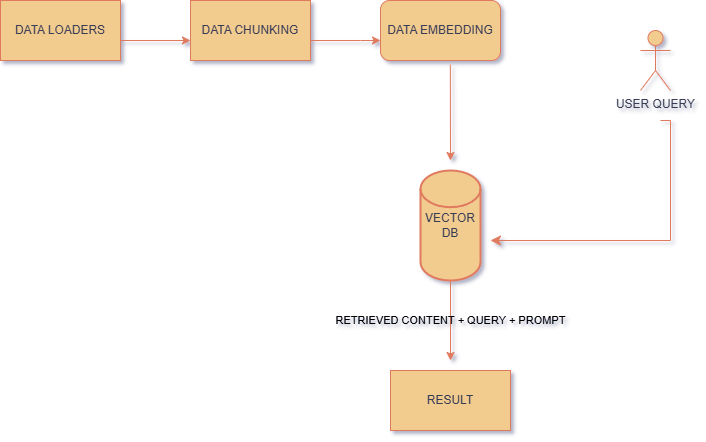

In [1]:
from IPython.display import Image

# Display a local image
Image(filename='rag_flow.drawio.png')


# Installation of Pkgs

In [ ]:
# pip install -U ragas langchain langchain-openai sacrebleu "unstructured[md]" libmagic rouge_score


In [79]:
from ragas.metrics import LLMContextRecall, Faithfulness, FactualCorrectness


In [80]:
from langchain_community.document_loaders import DirectoryLoader
from ragas.llms import LangchainLLMWrapper
from ragas.embeddings import LangchainEmbeddingsWrapper
from langchain_openai import ChatOpenAI
from langchain_openai import OpenAIEmbeddings
from ragas.testset import TestsetGenerator
import os
from dotenv import load_dotenv
from langchain_huggingface import HuggingFaceEmbeddings
load_dotenv()

llm = ChatOpenAI(temperature=0)

os.environ['OPENAI_API_KEY'] = os.getenv("OPENAI_API_KEY")
os.environ["HF_TOKEN"] = os.getenv("HF_TOKEN")

path = os.getenv("DATASET_PATH")

loader = DirectoryLoader(path, glob="**/*.md")
docs = loader.load()

generator_llm = LangchainLLMWrapper(llm)

generator_embeddings = LangchainEmbeddingsWrapper(HuggingFaceEmbeddings(model_name='all-MiniLM-L6-v2'))

generator = TestsetGenerator(llm=generator_llm, embedding_model=generator_embeddings)

dataset = generator.generate_with_langchain_docs(docs, testset_size=30)


libmagic is unavailable but assists in filetype detection. Please consider installing libmagic for better results.


Applying HeadlinesExtractor:   0%|          | 0/1 [00:00<?, ?it/s]

Applying HeadlineSplitter:   0%|          | 0/1 [00:00<?, ?it/s]

Applying SummaryExtractor:   0%|          | 0/1 [00:00<?, ?it/s]

Applying CustomNodeFilter:   0%|          | 0/5 [00:00<?, ?it/s]

unable to apply transformation: Failed to parse QuestionPotentialOutput from completion {"properties": {"score": {"description": "1 to 5 score", "title": "Score", "type": "integer"}}, "required": ["score"], "title": "QuestionPotentialOutput", "type": "object"}. Got: 1 validation error for QuestionPotentialOutput
score
  Field required [type=missing, input_value={'properties': {'score': ...tput', 'type': 'object'}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/OUTPUT_PARSING_FAILURE 
unable to apply transformation: Invalid json output: Given a document summary and node content, score the content of the node in 1 to 5 range.
Please return the output in a JSON format that complies with the following schema as specified in JSON Schema:
{"properties": {"score": {"description": "1 to 5 score", "title": "Score", "type": "integer"}}, "required": ["score"], "title

Applying [EmbeddingExtractor, ThemesExtractor, NERExtractor]:   0%|          | 0/11 [00:00<?, ?it/s]

Applying [CosineSimilarityBuilder, OverlapScoreBuilder]:   0%|          | 0/2 [00:00<?, ?it/s]

Generating personas:   0%|          | 0/1 [00:00<?, ?it/s]

Generating Scenarios:   0%|          | 0/2 [00:00<?, ?it/s]

Generating Samples:   0%|          | 0/27 [00:00<?, ?it/s]

In [94]:
import requests
import pandas as pd

def fetch_chat_response(row):
    payload = {
        "message": row['user_input'],
        "role": "engineering"
    }

    try:
        response = requests.post("http://localhost:8000/chat", json=payload)

        if response.status_code == 200:
            data = response.json()
            return pd.Series({
                "response": data.get("response", "No answer returned"),
                "retrieved_contexts": [data.get("retrieved_contexts", [])]
            })
        else:
            return pd.Series({
                "response": f"Error: {response.status_code}",
                "retrieved_contexts": []
            })

    except Exception as e:
        return pd.Series({
            "response": f"Exception: {str(e)}",
            "retrieved_contexts": []
        })


# Assuming `dataset` is a ragas Dataset
df = dataset.to_pandas()

# Apply once and get both response and retrieved_contexts
df[['response', 'retrieved_contexts']] = df.apply(fetch_chat_response, axis=1)


In [98]:
df

,user_input,reference_contexts,reference,synthesizer_name,response,retrieved_contexts
0,What is the scope of the engineering document ...,[FinSolve Technologies Engineering Document 1....,This document covers system architecture and i...,single_hop_specifc_query_synthesizer,- The engineering document for FinSolve Techno...,[This engineering document outlines the techni...
1,Can you provide an overview of FinSolve Techno...,[FinSolve Technologies Engineering Document 1....,FinSolve Technologies is a leading FinTech com...,single_hop_specifc_query_synthesizer,- FinSolve Technologies is headquartered in Ba...,[FinSolve Technologies is a leading FinTech co...
2,How many businesses does FinSolve Technologies...,[FinSolve Technologies Engineering Document 1....,"FinSolve Technologies serves 10,000 businesses...",single_hop_specifc_query_synthesizer,"- FinSolve Technologies serves 10,000 business...",[FinSolve Technologies is a leading FinTech co...
3,What technologies are used in the development ...,[2. System Architecture 2.1 Overview FinSolve'...,The Web Application component in FinSolve's ar...,single_hop_specifc_query_synthesizer,"I'm sorry, I do not have sufficient informatio...",[FinSolve's architecture is a microservices-ba...
4,What is the purpose of GraphQL in the system a...,[2. System Architecture 2.1 Overview FinSolve'...,GraphQL is one of the API interfaces used in F...,single_hop_specifc_query_synthesizer,- GraphQL in FinSolve's system architecture se...,[FinSolve's architecture is a microservices-ba...
5,What is the role of React in FinSolve's system...,[2. System Architecture 2.1 Overview FinSolve'...,React is utilized as the web application in Fi...,single_hop_specifc_query_synthesizer,"I'm sorry, I do not have sufficient informatio...",[FinSolve's architecture is a microservices-ba...
6,What is the Redux Toolkit mentioned in the tec...,[3. Technology Stack 3.1 Comprehensive Technol...,Redux Toolkit is listed as one of the primary ...,single_hop_specifc_query_synthesizer,- The Redux Toolkit is a set of tools and util...,[Layer Primary Technologies Supporting Technol...
7,What is the role of Jetpack Compose in the tec...,[3. Technology Stack 3.1 Comprehensive Technol...,Jetpack Compose is listed as a primary technol...,single_hop_specifc_query_synthesizer,- Jetpack Compose is a supporting technology u...,[Layer Primary Technologies Supporting Technol...
8,What is the primary technology used for backen...,[3. Technology Stack 3.1 Comprehensive Technol...,Backend development in the technology stack pr...,single_hop_specifc_query_synthesizer,- The primary technologies used for backend de...,[Layer Primary Technologies Supporting Technol...
9,What is the role of AWS KMS in data protection?,[5. Security and Compliance 5.1 Security Archi...,Encryption using AWS KMS is utilized for data ...,single_hop_specifc_query_synthesizer,- AWS KMS (Key Management Service) plays a cru...,[Data at rest: AES-256 encryption using AWS KM...


In [96]:
from ragas import EvaluationDataset

data_list = df.to_dict(orient='records')


evaluation_dataset = EvaluationDataset.from_list(data_list)
evaluation_dataset

EvaluationDataset(features=['user_input', 'retrieved_contexts', 'reference_contexts', 'response', 'reference'], len=27)

In [103]:
from ragas import evaluate
from ragas.llms import LangchainLLMWrapper
from langchain_openai import ChatOpenAI
from ragas.metrics import LLMContextRecall, Faithfulness, FactualCorrectness, LLMContextPrecisionWithoutReference, LLMContextPrecisionWithReference,LLMContextRecall, NonLLMContextRecall, ResponseRelevancy, SemanticSimilarity, StringPresence, ExactMatch
from ragas.metrics import LLMContextPrecisionWithReference, BleuScore, RougeScore


llm = ChatOpenAI()

evaluator_llm = LangchainLLMWrapper(llm)

result = evaluate(
    dataset=evaluation_dataset,
    metrics=[LLMContextRecall(),LLMContextPrecisionWithoutReference(),LLMContextPrecisionWithReference(),Faithfulness(), FactualCorrectness(),NonLLMContextRecall(),ResponseRelevancy(),SemanticSimilarity(),BleuScore(),RougeScore(),StringPresence(),ExactMatch()],
    llm=evaluator_llm,
)

result

Evaluating:   0%|          | 0/324 [00:00<?, ?it/s]

{'context_recall': 0.7889, 'llm_context_precision_without_reference': 0.3704, 'llm_context_precision_with_reference': 0.8148, 'faithfulness': 0.4445, 'factual_correctness(mode=f1)': 0.2111, 'non_llm_context_recall': 0.0000, 'answer_relevancy': 0.3588, 'semantic_similarity': 0.7986, 'bleu_score': 0.0739, 'rouge_score(mode=fmeasure)': 0.1841, 'string_present': 0.0370, 'exact_match': 0.0000}

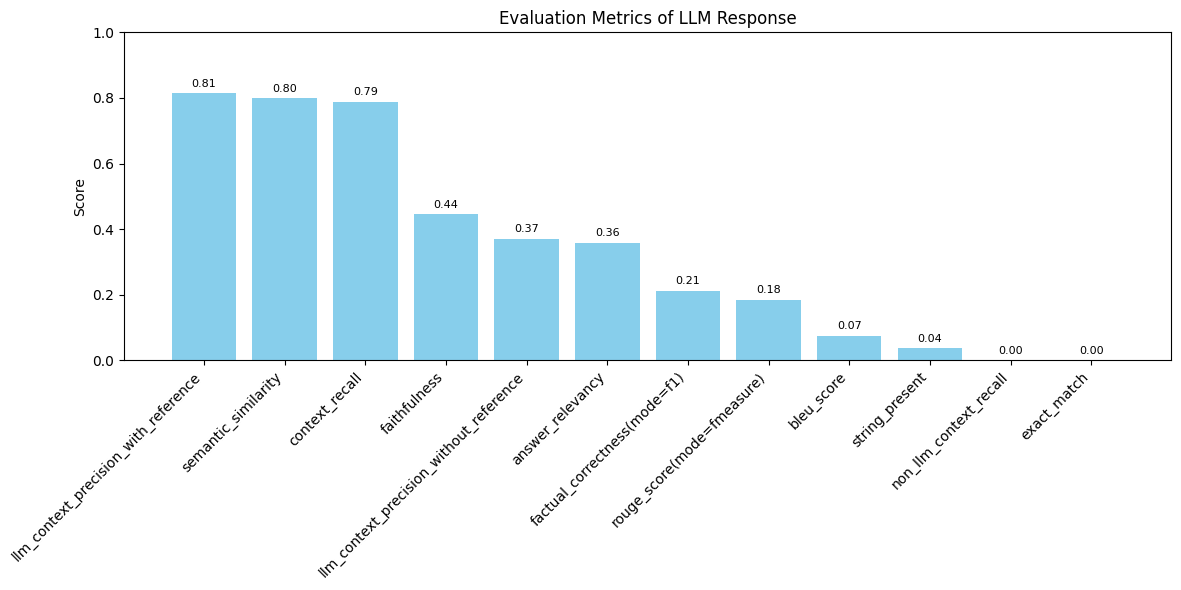

In [105]:
import matplotlib.pyplot as plt

# Your evaluation metrics
metrics = {
    'context_recall': 0.7889,
    'llm_context_precision_without_reference': 0.3704,
    'llm_context_precision_with_reference': 0.8148,
    'faithfulness': 0.4445,
    'factual_correctness(mode=f1)': 0.2111,
    'non_llm_context_recall': 0.0,
    'answer_relevancy': 0.3588,
    'semantic_similarity': 0.7986,
    'bleu_score': 0.0739,
    'rouge_score(mode=fmeasure)': 0.1841,
    'string_present': 0.0370,
    'exact_match': 0.0
}

# Sort by value (optional for better visual clarity)
metrics = dict(sorted(metrics.items(), key=lambda item: item[1], reverse=True))

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(metrics.keys(), metrics.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Evaluation Metrics of LLM Response')

# Add value labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}', ha='center', fontsize=8)

plt.tight_layout()
plt.show()
